# Shooting Method for Sin and Cos Modes in 1D Wave Equation

We employ the shooting method to compute the sin and cos modes in the harmonic balance method applied to the 1D wave equation.

## Import Packages

In [1]:
using BoundaryValueDiffEq
using Plots

## Section 1: 1D Diffusion Equation  

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


ReturnCode.Success = 1

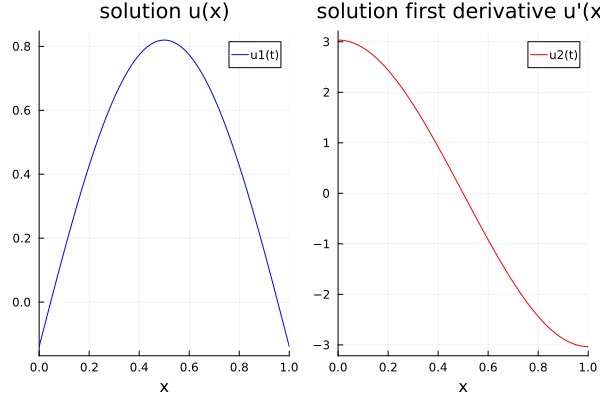

In [16]:
# set range in x-domain 
xspan = (0.0, 1.0)

# set rhs-function 
function rhs!(du, u, p, x)
    du[1] = u[2]
    du[2] = -π^2*sin(π*x) + u[1]^3
end

# set boundary condition function 
function bc1!(residual, u, p, x)
    residual[1] = u[1][1]        # homogeneous Dirichlet left 
    residual[2] = u[end][1]      # homogeneous Dirichlet right
    residual[2] = u[end][1] - 1  # non - homogeneous Dirichlet right
    residual[2] = u[end][2]      # homogeneous Neumann right
    residual[2] = u[end][2] - 1  # non - homogeneous Neumann right
    residual[1] = u[1][1] -  u[end][1]  # periodic condition on u(x)
    residual[2] = u[1][2] -  u[end][2]  # periodic condition on u'(x)
end

function bc2!(residual, u, p, x)
    residual[1] = u[1][1]        # homogeneous Dirichlet left 
    residual[2] = u[end][1]      # homogeneous Dirichlet right
end

function bc3!(residual, u, p, x)
    residual[1] = u[1][1] -  u[end][1]  # periodic condition on u(x)
    residual[2] = u[1][2] +  u[end][2]  # periodic condition on u'(x)
end


# set problem 
bvp = BVProblem(rhs!, bc3!, [0,0], xspan)

# solve problem 
sol = solve(bvp, MIRK4(), dt = 0.01)
display(sol.retcode)

#..plot computed velocity and position 
p1 = plot(sol,idxs=1,line = :blue,xlabel="x",title="solution u(x)")
p2 = plot(sol,idxs=2,line = :red,xlabel="x",title="solution first derivative u'(x)")
plot(p1,p2,layout = (1,2))